### Opinet - 셀프 주유소가 정말 저렴할까?

In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

##### 1. Selenium으로 서울시 구별 주유소 가격정보 얻기

In [2]:
# Opinet 초기 화면 / 싼 주유소 찾기 / 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
time.sleep(2)

In [3]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')        # 광역시도
metro.send_keys('서울')

In [4]:
sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')   # 시/군/구
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="c9a0fe1218e118383692aa0a3bf0cfe9", element="1363ec35-d73b-4572-80b9-4a9f36487f09")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9a0fe1218e118383692aa0a3bf0cfe9", element="f8a5f63a-bf4a-43e0-8a02-34c73b88b222")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9a0fe1218e118383692aa0a3bf0cfe9", element="32c300e4-ec12-47c9-967e-77e3512991b1")>]

In [5]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [6]:
gu_names = [gu.text for gu in gu_list[1:]]      # 시/군/구를 제외한 구 이름의 리스트
gu_names[:3]

['강남구', '강동구', '강북구']

In [7]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [9]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()
time.sleep(2)

In [10]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(2)

In [11]:
driver.close()

##### 2. 구별 휘발유 가격에 대한 정리

In [13]:
from glob import glob
glob('C:/Users/YONSAI/Downloads/지역*.xls')

['C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (25).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/YONS

In [14]:
# pip install xlrd
file = glob('C:/Users/YONSAI/Downloads/지역*.xls')[-1]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,1798,1629,1519,-
1,서울특별시,성북역주유소,서울 노원구 광운로 95 (월계동),GS칼텍스,02-919-8141,N,1858,1658,1548,-
2,서울특별시,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),GS칼텍스,02-973-5172,Y,1825,1665,1545,-
3,서울특별시,삼육주유소,서울 노원구 화랑로 822 (공릉동),SK에너지,02-949-3677,Y,-,1675,1545,1600
4,서울특별시,한신주유소,서울 노원구 동일로 1089 (공릉동),SK에너지,02-974-5151,Y,1885,1685,1545,-


In [15]:
# 25개 파일을 읽어서 하나의 데이터프레임으로 만들기
df_list = []
for file in glob('C:/Users/YONSAI/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    df_list.append(df)

df = pd.concat(df_list)
df.shape

(441, 10)

In [16]:
df = df[['상호','주소','휘발유','셀프여부','상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1653,Y,SK에너지
1,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),1699,Y,현대오일뱅크
2,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1699,Y,현대오일뱅크
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1699,Y,현대오일뱅크
4,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1699,Y,SK에너지


In [17]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
9,노원주유소,서울 노원구 동일로 1008 (공릉동),1738,N,GS칼텍스
10,신성주유소,서울 노원구 월계로 328 (월계동),1738,Y,S-OIL
11,SK에너지㈜직영 상계주유소,서울 노원구 노해로 527 (상계동),1739,N,SK에너지
12,상계동주유소,서울 노원구 노원로26길 191 (상계동),1740,N,현대오일뱅크
13,하계삼호주유소,서울 노원구 공릉로 294 (하계동),1795,N,GS칼텍스


In [18]:
df['구'] = df.주소.str.split().str[1]   # df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1653,Y,SK에너지,강남구
1,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),1699,Y,현대오일뱅크,강남구
2,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1699,Y,현대오일뱅크,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1699,Y,현대오일뱅크,강남구
4,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1699,Y,SK에너지,강남구


In [19]:
df.구.unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [20]:
# 가격을 정수로 변환
df.가격 = df.가격.astype(int)

##### 3. 셀프주유소는 정말 저렴할까?

In [21]:
# 셀프/일반 주유소 가격 평균
df.pivot_table('가격', '셀프', aggfunc=['count', 'mean', 'min', 'max'])

,count,mean,min,max
,가격,가격,가격,가격
셀프,,,,
N,180,1839.194444,1604,2690
Y,261,1685.678161,1589,2140


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

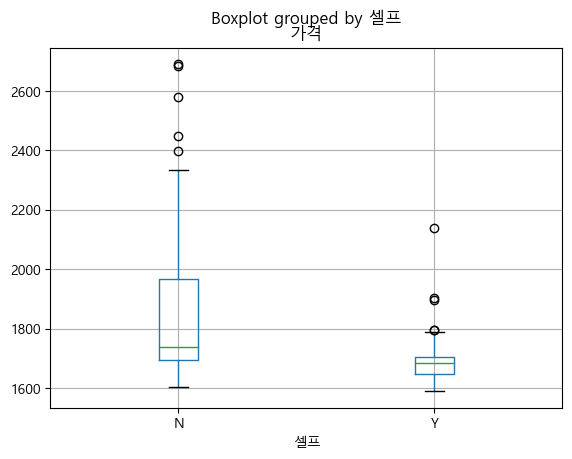

In [23]:
df.boxplot(column='가격', by='셀프')
plt.show()

- 가설검정(2-sample T)

In [24]:
import scipy as sp 
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.082123464462475, pvalue=1.2583924963464169e-16)

In [25]:
# p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
#    - 귀무가설(H0): 셀프주유소와 일반주유소의 가격 차이가 없다.
#    - 대립가설(H1): 셀프주유소와 일반주유소의 가격 차이가 있다.

- 상표별로 가격 비교

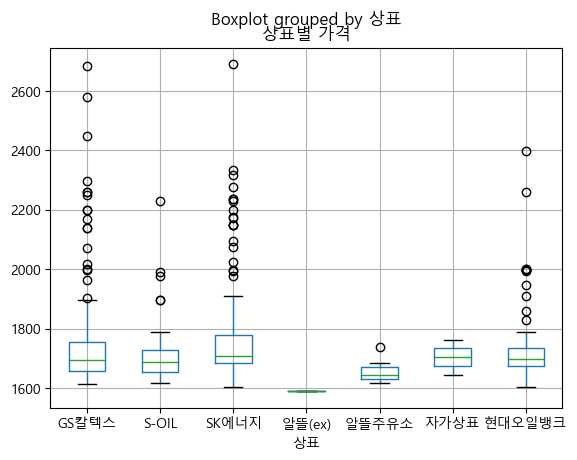

In [26]:
df.boxplot(column='가격', by='상표')
plt.title('상표별 가격')
plt.show()

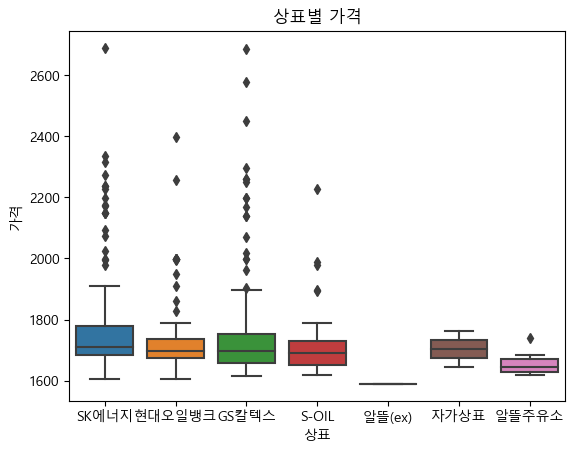

In [27]:
sns.boxplot(x='상표', y='가격', data=df)
plt.title('상표별 가격')
plt.show()

In [28]:
df.pivot_table('가격', '상표', aggfunc=['count', 'mean', 'min', 'max'])

,count,mean,min,max
,가격,가격,가격,가격
상표,,,,
GS칼텍스,105,1780.466667,1614,2685
S-OIL,79,1708.405063,1618,2228
SK에너지,130,1775.653846,1604,2690
알뜰(ex),1,1589.000000,1589,1589
알뜰주유소,10,1654.300000,1618,1738
자가상표,2,1704.000000,1645,1763
현대오일뱅크,114,1725.692982,1604,2398


- 구별로 가격 비교

In [29]:
df.pivot_table('가격', '구', aggfunc=['count', 'mean', 'min', 'max']) \
        .sort_values(by=('mean','가격'), ascending=False)

,count,mean,min,max
,가격,가격,가격,가격
구,,,,
용산구,12,2148.250000,1948,2685
중구,10,2048.200000,1659,2690
종로구,9,1955.444444,1669,2260
강남구,34,1937.617647,1653,2578
성동구,16,1799.750000,1645,2170
강동구,13,1742.384615,1679,1978
관악구,14,1742.214286,1685,1862
서초구,30,1738.866667,1589,1989
